# Multiple Linear Regression
# Assignment

#### Problem Statement:

This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. You will need to submit a Jupyter notebook for the same. 

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Libraries

import numpy as np
import pandas as pd

In [3]:
# import file
day = pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### Inspect the various aspects of the day dataframe

In [5]:
day.shape

(730, 16)

###### Check if data having any NULL value

In [6]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
#Check for the information about datset provided (like datatype)
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Quickly assess the statistics for numerical attributes
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

###### Draw pairplot to see the correlation among the numerical variables.

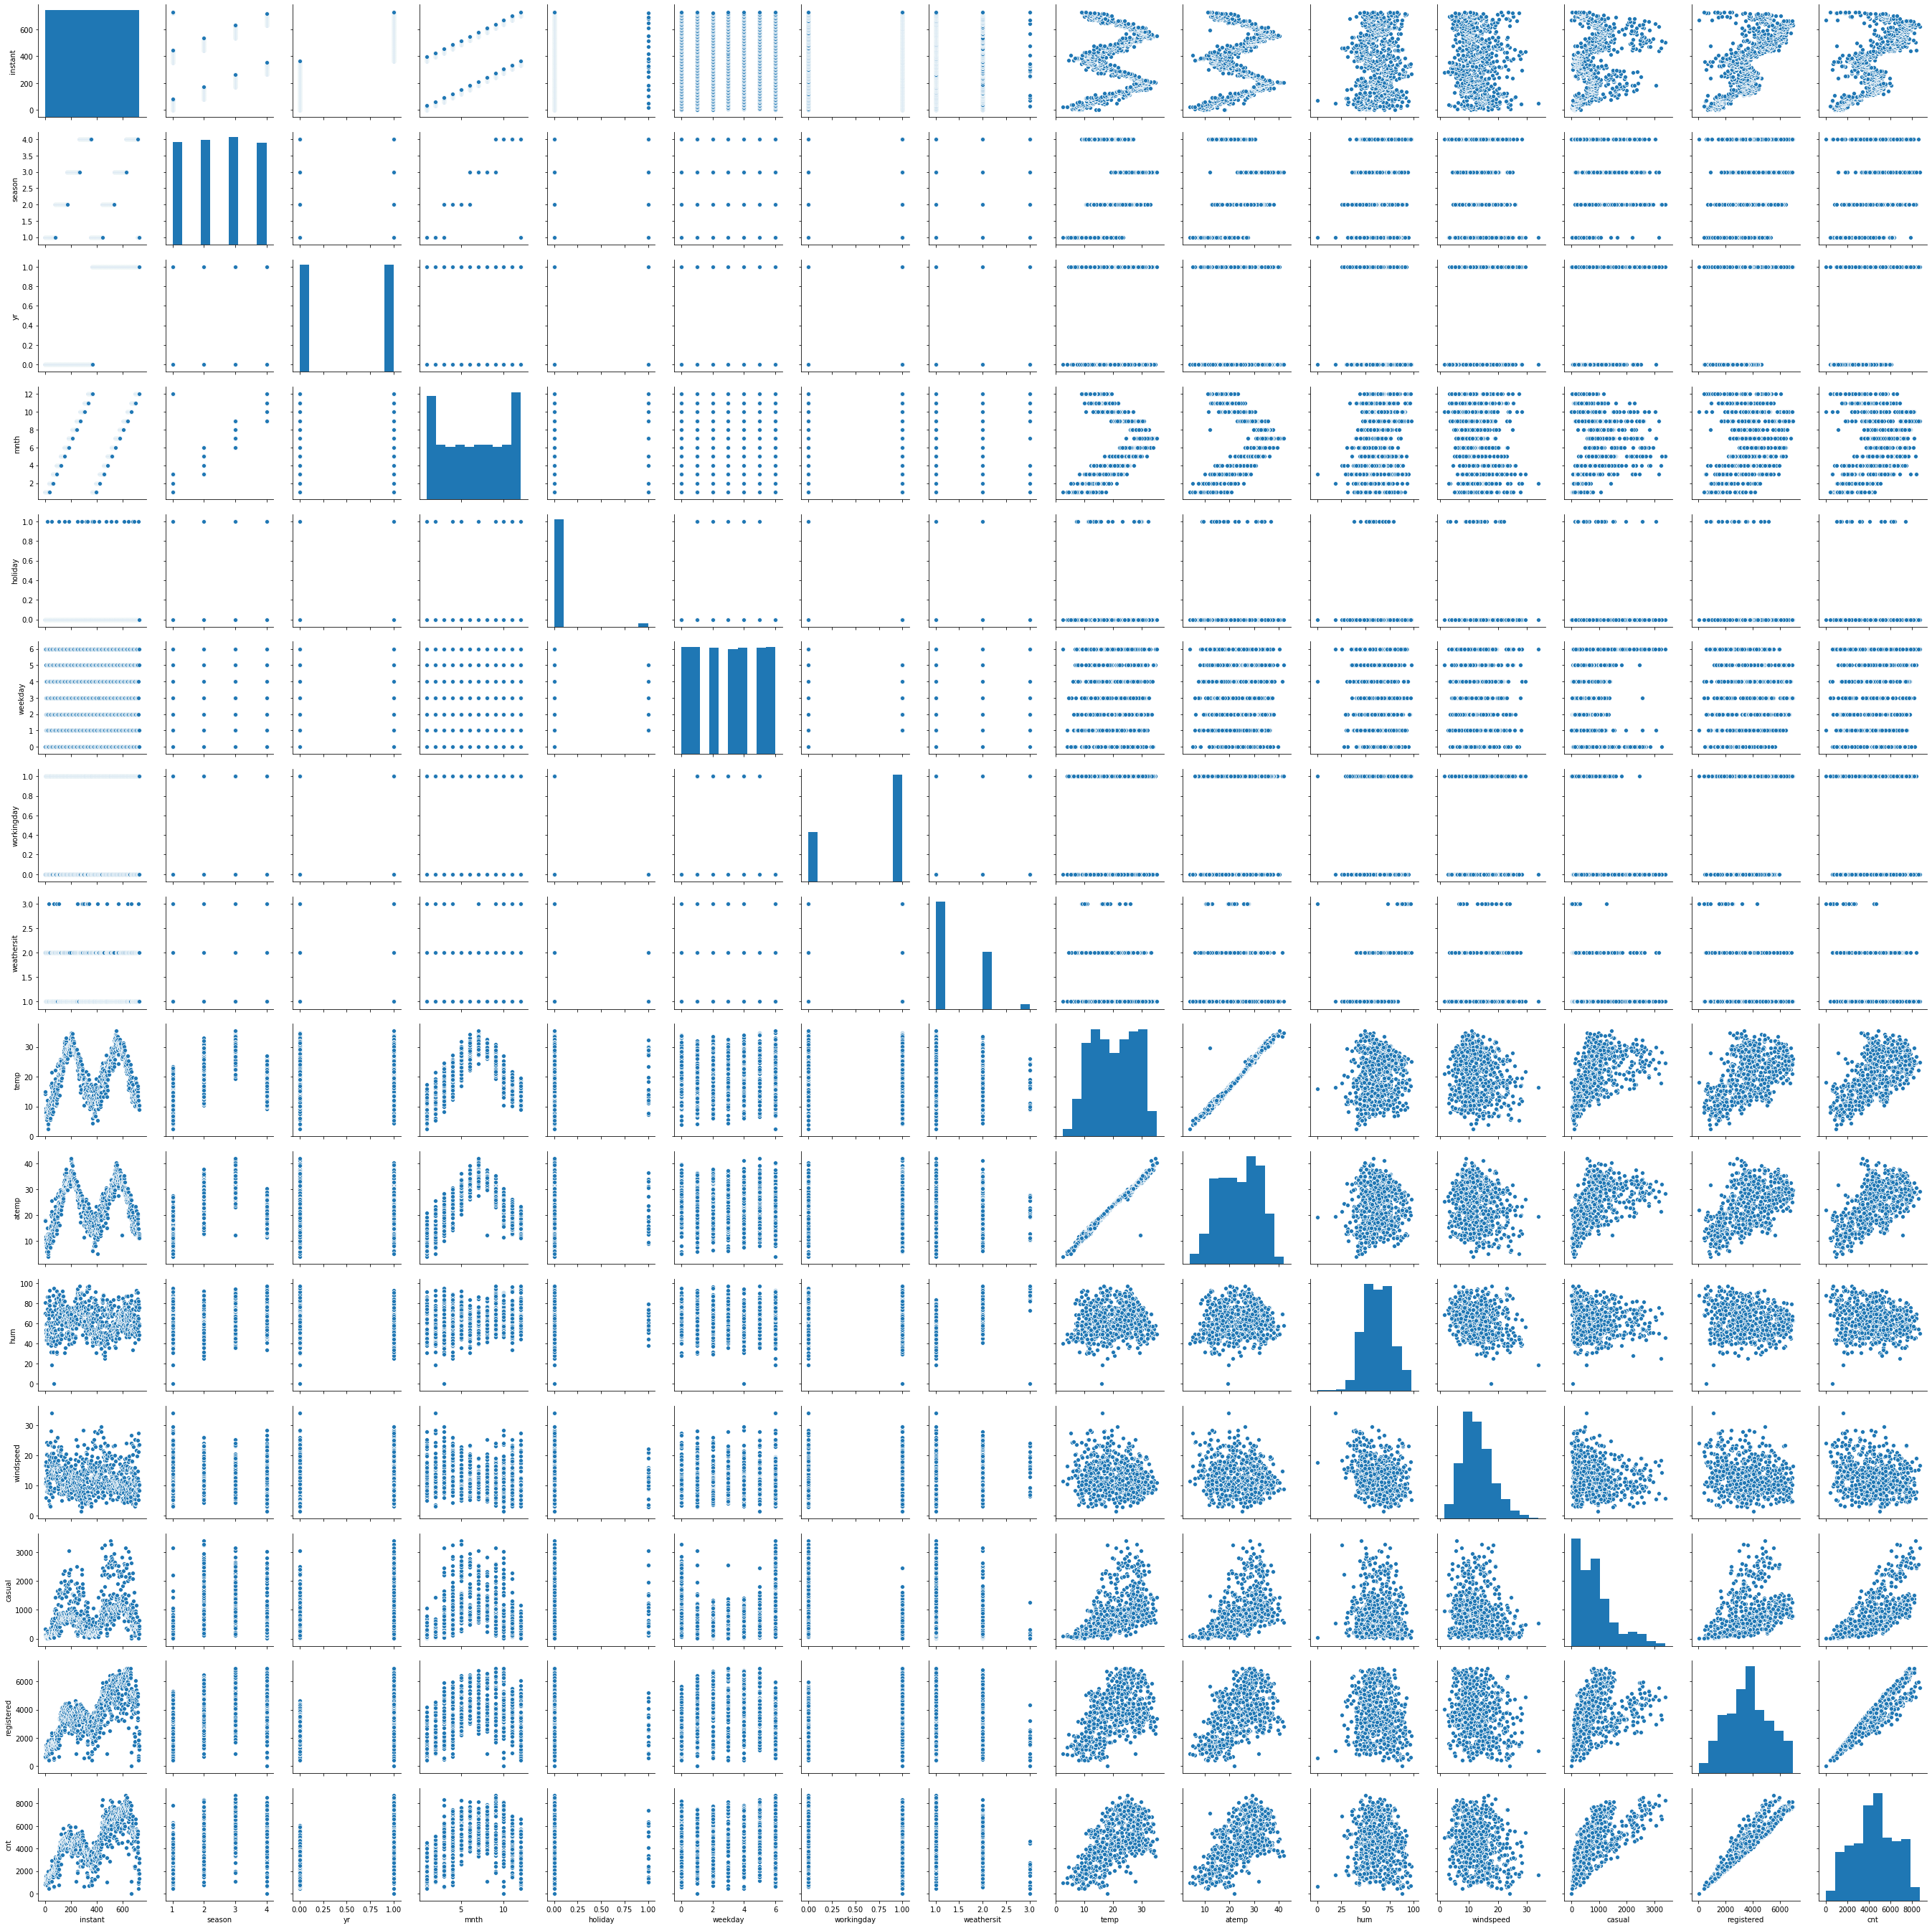

In [10]:
sns.pairplot(day)
plt.show()

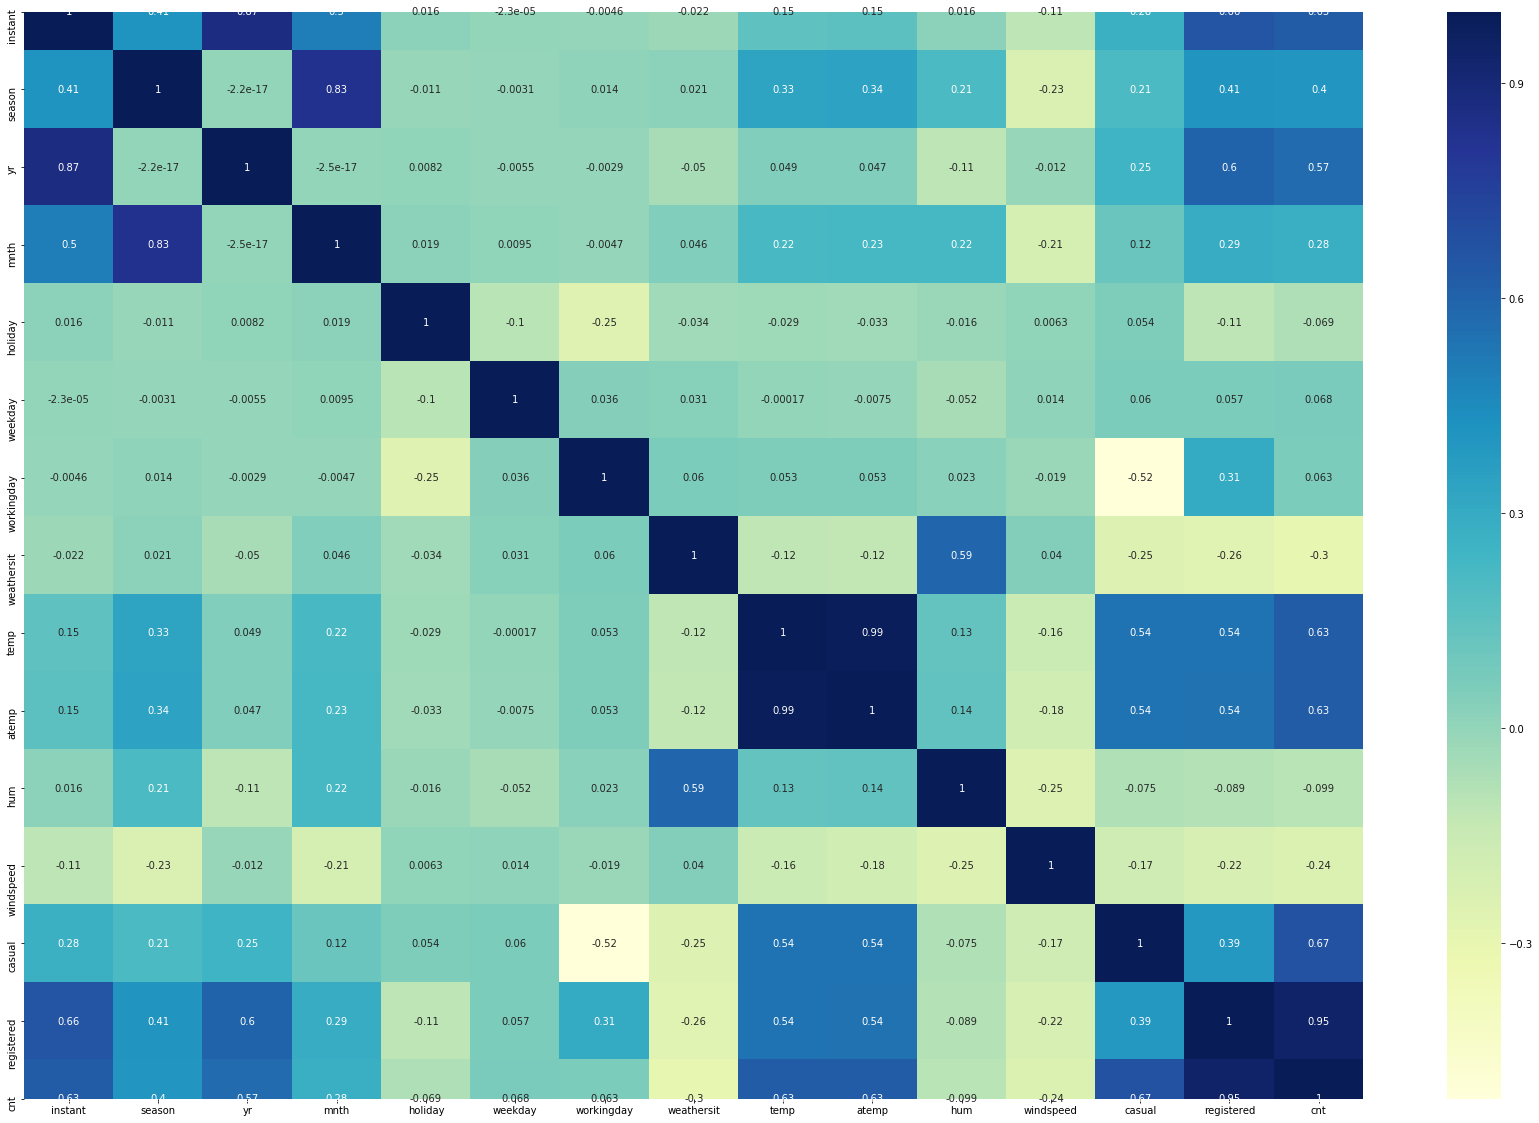

In [11]:
plt.figure(figsize = (30, 20))
sns.heatmap(day.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### Visualize some of the categorical variable

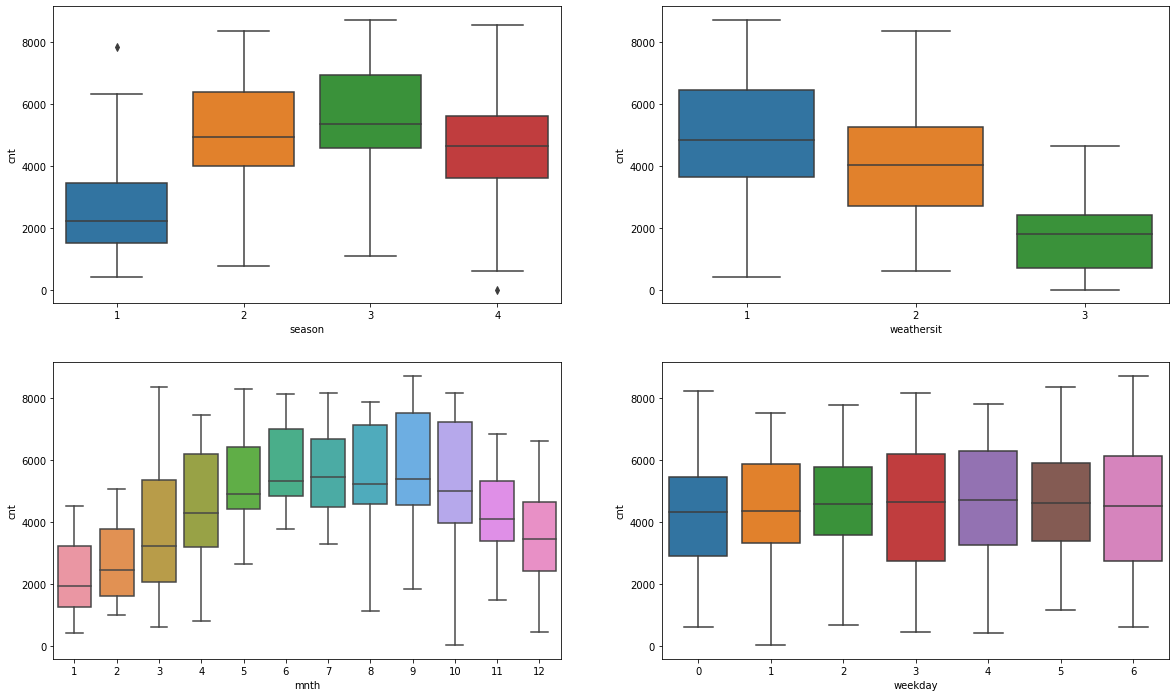

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(2,2,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.subplot(2,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.subplot(2,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.show()

##### We can also visualise some of these categorical features parallely by using the hue argument. 

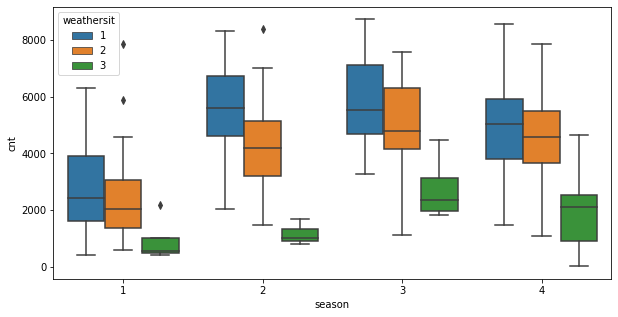

In [13]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = day)
plt.show()

## Step 3: Data Preparation

#### Delete Unnecessary Columns

##### instant is just a index number, we dont need this for analysis

In [14]:
day.drop(['instant'], axis = 1, inplace = True)

#####  Month and Year information is already provided. Additionally, we are not doing time series analysis so we dont need this for analysis

In [15]:
day.drop(['dteday'], axis = 1, inplace = True)

##### casual and registered sums-up to cnt , we dont need this for analysis as this would create multicolinearity

In [16]:
day.drop(['casual'], axis = 1, inplace = True)

In [17]:
day.drop(['registered'], axis = 1, inplace = True)

##### Inspect the data after deletion

In [18]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Change the values of Categorical variables before using Dummies

##### Check the count of season's values before changing the name of its categories to meaningful name

In [19]:
day['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

##### First give some meaningful Name so that Dummies can be identified easily

In [20]:
def label_day(x):
   if x['season'] == 1:
      return 'spring'
   elif x['season'] ==2:
      return 'summer'
   elif x['season'] == 3:
      return 'fall'
   elif x['season'] == 4:
      return 'winter'
day['season']=day.apply(lambda x: label_day(x), axis=1)
day.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


##### Cross check the results with above counts of categories

In [21]:
day['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

##### Create Dummies

In [22]:
status_season = pd.get_dummies(day['season'])

In [23]:
status_season.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


##### Add Dummies to Original dataframe after dropping first column which is not needed

In [24]:
status_season = pd.get_dummies(day['season'], drop_first = True)

In [25]:
day = pd.concat([day, status_season], axis = 1)

##### Drop original Season column as dummies are added now

In [26]:
day.drop(['season'], axis = 1, inplace = True)

#### Repeat the same steps for weathersit, mnth and day columns

In [27]:
day['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [28]:
def label_weathersit(x):
   if x['weathersit'] == 1:
      return 'Clear'
   elif x['weathersit'] ==2:
      return 'Mist + Cloudy'
   elif x['weathersit'] == 3:
      return 'Light Snow'
   elif x['weathersit'] == 4:
      return 'Heavy Rain'
day['weathersit']=day.apply(lambda x: label_weathersit(x), axis=1)
day.head(5)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,6,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,0,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [29]:
day['weathersit'].value_counts()

Clear            463
Mist + Cloudy    246
Light Snow        21
Name: weathersit, dtype: int64

In [30]:
status_wethr = pd.get_dummies(day['weathersit'])

In [31]:
status_wethr.head()

,Clear,Light Snow,Mist + Cloudy
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [32]:
status_wethr = pd.get_dummies(day['weathersit'], drop_first = True)

In [33]:
day = pd.concat([day, status_wethr], axis = 1)

In [34]:
day.drop(['weathersit'], axis = 1, inplace = True)

In [35]:
day['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [36]:
def label_mnth(x):
   if x['mnth'] == 1:
      return 'Jan'
   elif x['mnth'] ==2:
      return 'Feb'
   elif x['mnth'] == 3:
      return 'Mar'
   elif x['mnth'] == 4:
      return 'April'
   elif x['mnth'] ==5:
      return 'May'
   elif x['mnth'] == 6:
      return 'June'
   elif x['mnth'] == 7:
      return 'July'
   elif x['mnth'] ==8:
      return 'Aug'
   elif x['mnth'] == 9:
      return 'Sep'
   elif x['mnth'] == 10:
      return 'Oct'
   elif x['mnth'] == 11:
      return 'Nov'
   elif x['mnth'] == 12:
      return 'Dec'
day['mnth']=day.apply(lambda x: label_mnth(x), axis=1)
day.head(5)

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist + Cloudy
0,0,Jan,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,Jan,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,Jan,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,Jan,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,Jan,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [37]:
day['mnth'].value_counts()

May      62
Oct      62
July     62
Jan      62
Aug      62
Dec      62
Mar      62
Nov      60
April    60
June     60
Sep      60
Feb      56
Name: mnth, dtype: int64

In [38]:
status_mnth = pd.get_dummies(day['mnth'])

In [39]:
status_mnth.head()

,April,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [40]:
status_mnth = pd.get_dummies(day['mnth'], drop_first = True)

In [41]:
day = pd.concat([day, status_mnth], axis = 1)

In [42]:
day.drop(['mnth'], axis = 1, inplace = True)

In [43]:
day['weekday'].value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [44]:
def label_day(x):
   if x['weekday'] == 0:
      return 'Sun'
   elif x['weekday'] == 1:
      return 'Mon'
   elif x['weekday'] ==2:
      return 'Tues'
   elif x['weekday'] == 3:
      return 'Wed'
   elif x['weekday'] == 4:
      return 'Thurs'
   elif x['weekday'] ==5:
      return 'Fri'
   elif x['weekday'] == 6:
      return 'Sat'

day['weekday']=day.apply(lambda x: label_day(x), axis=1)
day.head(5)

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,Sat,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Sun,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Mon,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Tues,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Wed,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [45]:
status_day = pd.get_dummies(day['weekday'])

In [46]:
status_day.head()

,Fri,Mon,Sat,Sun,Thurs,Tues,Wed
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1


In [47]:
status_day = pd.get_dummies(day['weekday'], drop_first = True)

In [48]:
day = pd.concat([day, status_day], axis = 1)

In [49]:
day.drop(['weekday'], axis = 1, inplace = True)

##### Check the Data after adding all the Dummies 

In [50]:
day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
day.shape

(730, 30)

In [52]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
yr               730 non-null int64
holiday          730 non-null int64
workingday       730 non-null int64
temp             730 non-null float64
atemp            730 non-null float64
hum              730 non-null float64
windspeed        730 non-null float64
cnt              730 non-null int64
spring           730 non-null uint8
summer           730 non-null uint8
winter           730 non-null uint8
Light Snow       730 non-null uint8
Mist + Cloudy    730 non-null uint8
Aug              730 non-null uint8
Dec              730 non-null uint8
Feb              730 non-null uint8
Jan              730 non-null uint8
July             730 non-null uint8
June             730 non-null uint8
Mar              730 non-null uint8
May              730 non-null uint8
Nov              730 non-null uint8
Oct              730 non-null uint8
Sep              730 non-null uint8
Mon              730 no

## Step 4: Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split. 70-30 Split is done foe this Case 

In [53]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features using MinMaxScaler

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler()

In [56]:
day.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'Light Snow', 'Mist + Cloudy',
       'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tues', 'Wed'],
      dtype='object')

In [57]:
num_vars = ['temp', 'atemp', 'hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

##### Check all the values are in between 1 and 0 after scaling all the numercial variable.

Note that there is no need to scale dummy variables as those are already either 1 or 0

In [58]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,1,0,0,0,0


In [59]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Let's check the correlation coefficients to see which variables are highly correlated

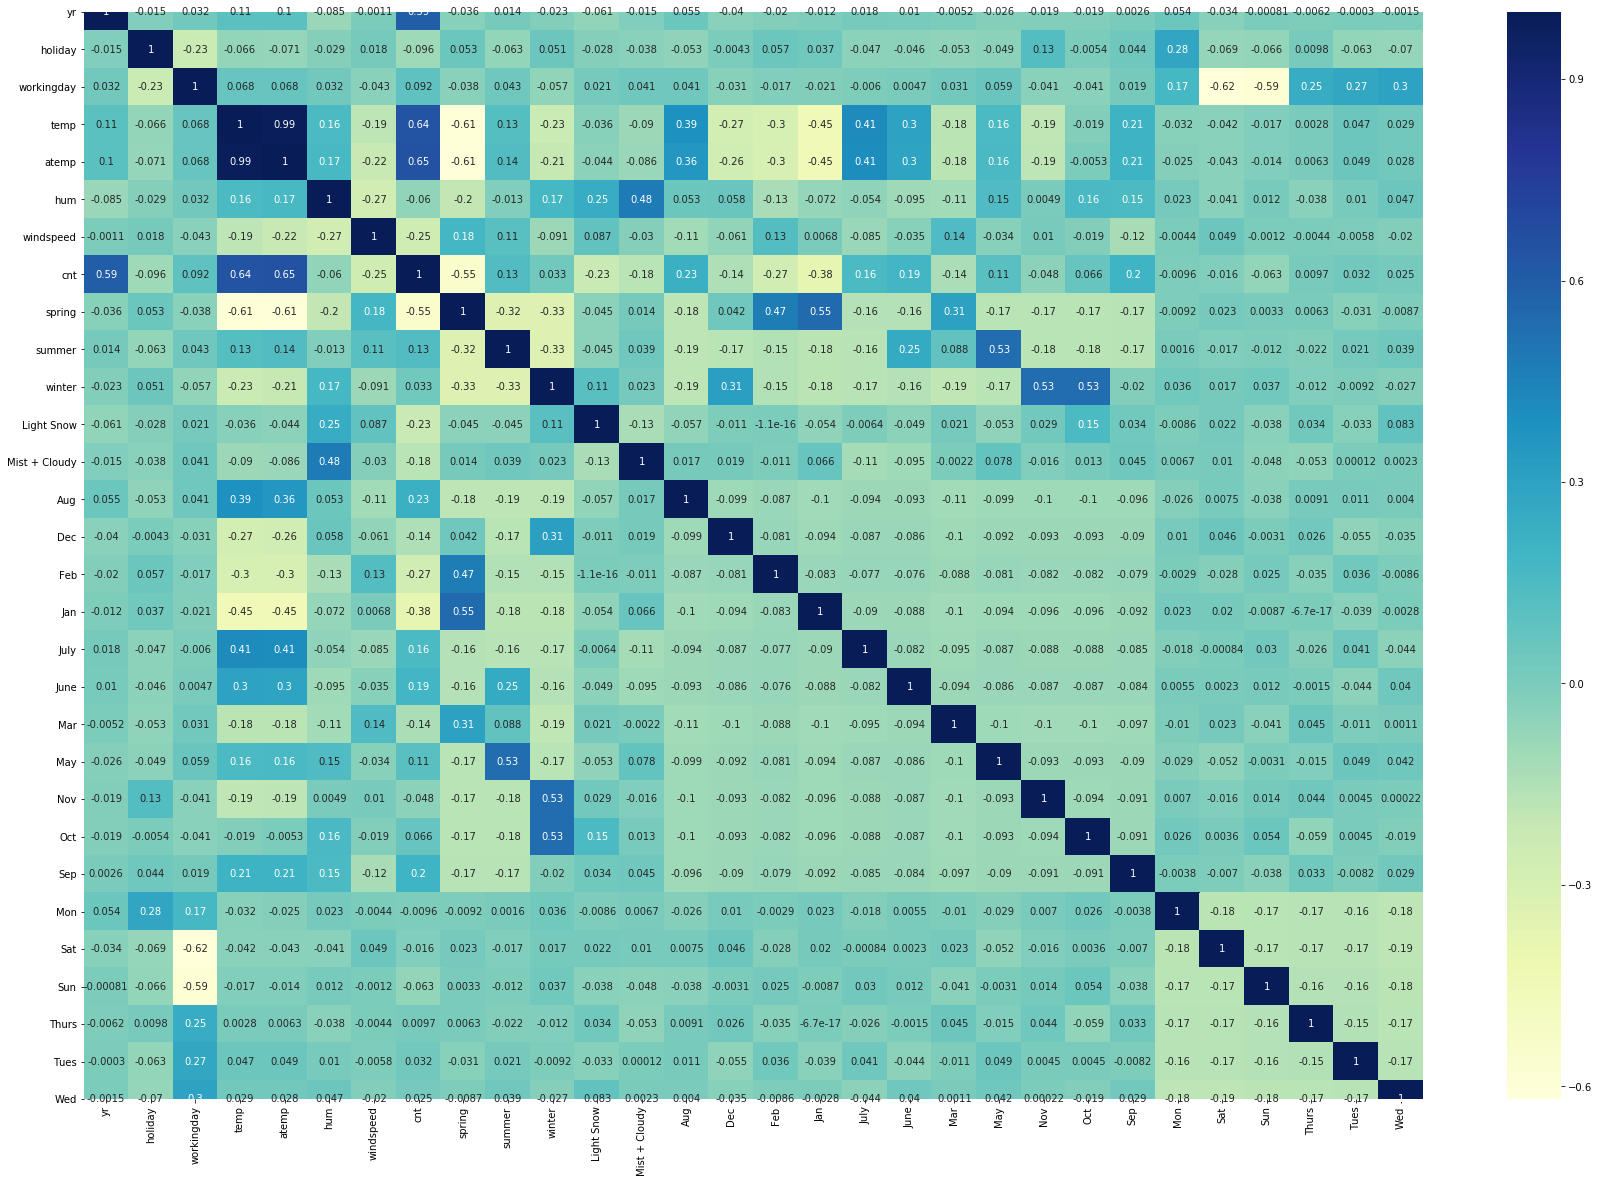

In [60]:
plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### Let's see one sample corelation by plotting correlation between temp and cnt

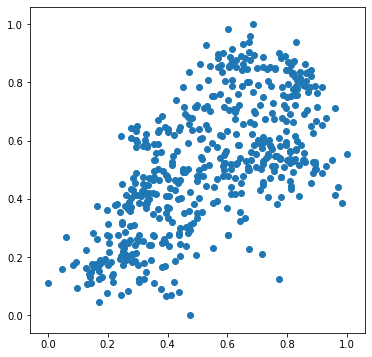

In [61]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

##### Remove cnt from the y_train as cnt is Target Variable

In [62]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model using mixed approach of RFE and Manual

### RFE
Recursive feature elimination

In [63]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

##### Running RFE with the output number of the variable equal to 15. Remember we had 30 attributes in our dataset.

In [64]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

rfe = RFE(model_1, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

##### Check for RFE Ranking

In [65]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 9),
 ('Sep', True, 1),
 ('Mon', False, 13),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thurs', False, 10),
 ('Tues', False, 14),
 ('Wed', False, 12)]

##### Check for the attributes retained and excluded after RFE is performed

In [66]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Light Snow', 'Mist + Cloudy', 'Jan', 'July', 'Sep',
       'Sat'],
      dtype='object')

In [67]:
X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon',
       'Sun', 'Thurs', 'Tues', 'Wed'],
      dtype='object')

In [68]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Building model using statsmodel, for the detailed statistics

In [69]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

## MODEL 1

In [70]:
model_1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [71]:
#Let's see the summary of our linear model
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Tue, 21 Apr 2020   Prob (F-statistic):          2.31e-191
Time:                        00:21:51   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2510      0.036      6.949

We have seen our first Model with High R-squared and adjusted R-squared. But there is pretty high insignificance of Jan as the P Value is pretty high.

Also some of the variables are having negative coefficients. For eg, holiday, hum etc.

Lets Drop the Constant to check VIF Values

In [72]:
X_train_1 = X_train_rfe.drop(['const'], axis=1)

In [73]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.48
7,summer,2.84
10,Mist + Cloudy,2.29
0,yr,2.09
14,Sat,1.98


As seen VIF is pretty high for hum so hum can be dropped

## MODEL 2

Let's drop hum as VIF is pretty high for it

In [74]:
X_train_1 = X_train_1.drop(['hum'], axis=1)

Repeat the same steps again to build another Model without hum

In [75]:
# Build a second fitted model
X_train_2 = sm.add_constant(X_train_1)

model_2 = sm.OLS(y_train, X_train_2).fit()

In [76]:
# Print the summary of the model
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Tue, 21 Apr 2020   Prob (F-statistic):          7.33e-189
Time:                        00:22:06   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1737      0.031      5.525

Observe that R-squared and Adj R-squared is dropped a little, which is expected. Also P Value is changed for some of the attributes

Check again for the VIF and impact of dropping hum

In [77]:
X_train_2 = X_train_2.drop(['const'], axis=1)

In [78]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,spring,3.08
6,summer,2.33
0,yr,2.08
7,winter,1.99
13,Sat,1.97
10,Jan,1.62
11,July,1.59


Just dropping hum made the whole VIF for other variables quite low

## MODEL 3

Drop workingday as its second highest VIF and its above 5

We will discuss shortly why temp is not dropped on the first place. For now just have a reference that temp is having highest correlation with target variable cnt as shown in above heatmap

In [79]:
X_train_2 = X_train_2.drop(['workingday'], axis=1)

In [80]:
# Build a second fitted model
X_train_3 = sm.add_constant(X_train_2)

model_3 = sm.OLS(y_train, X_train_3).fit()

In [81]:
# Print the summary of the model
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Tue, 21 Apr 2020   Prob (F-statistic):          1.21e-186
Time:                        00:22:25   Log-Likelihood:                 503.12
No. Observations:                 510   AIC:                            -978.2
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2121      0.030      6.986

Again there is a slight down in R-squared and Adj R-squared. Also can observe some changes in P Value.

No P Value is pretty high though

Check for VIF again and the impact of dropping workingday variable

In [82]:
X_train_3 = X_train_3.drop(['const'], axis=1)

In [83]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.16
3,windspeed,4.64
4,spring,2.76
5,summer,2.23
0,yr,2.07
6,winter,1.80
9,Jan,1.61
10,July,1.59
8,Mist + Cloudy,1.56
11,Sep,1.34


All the VIF are below 5 apart from temp.

## MODEL 4

Now since temp is having VIF above 5, try dropping it

In [84]:
X_train_3 = X_train_3.drop(['temp'], axis=1)

In [85]:
# Build a second fitted model
X_train_4 = sm.add_constant(X_train_3)

model_4 = sm.OLS(y_train, X_train_4).fit()

In [86]:
# Print the summary of the model
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     143.1
Date:                Tue, 21 Apr 2020   Prob (F-statistic):          1.27e-152
Time:                        00:22:32   Log-Likelihood:                 419.56
No. Observations:                 510   AIC:                            -813.1
Df Residuals:                     497   BIC:                            -758.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5855      0.017     35.472

R-squared and Adj R-squared dropped significantly. Seems dropping temp is not good idea.

## MODEL 5

Since Model 4 observed high decrease in R-squared and Adj R-squared, we would not consider that model.

Let's continue our analysis with Model 3.

Let's drop Sat as its having highest P Value in Model 3

In [87]:
X_train_4 = X_train_2.drop(['Sat'], axis=1)

In [88]:
# Build a second fitted model
X_train_5 = sm.add_constant(X_train_4)

model_5 = sm.OLS(y_train, X_train_5).fit()

In [89]:
# Print the summary of the model
print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Tue, 21 Apr 2020   Prob (F-statistic):          3.97e-187
Time:                        00:22:35   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2155      0.030      7.096

Observe again R-squared and Adj R-squared changed but there is very less impact compared to Model 3

Check for VIF again

In [90]:
X_train_5 = X_train_5.drop(['const'], axis=1)

In [91]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.61
4,spring,2.75
5,summer,2.22
0,yr,2.07
6,winter,1.79
9,Jan,1.61
10,July,1.59
8,Mist + Cloudy,1.56
11,Sep,1.34


Still got temp VIF above 5 but we can not drop it as it will reduce R-squared and Adj R-squared significantly

## MODEL 6

From the previous model Jan was having high P Values. Let's get rid of it.

In [92]:
X_train_5 = X_train_5.drop(['Jan'], axis=1)

In [93]:
# Build a second fitted model
X_train_6 = sm.add_constant(X_train_5)

model_6 = sm.OLS(y_train, X_train_6).fit()

In [94]:
# Print the summary of the model
print(model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Tue, 21 Apr 2020   Prob (F-statistic):          2.40e-187
Time:                        00:22:39   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1996      0.030      6.758

Very little change in R-squared and Adj R-squared, which is good sign.

Check for the impact on VIF again

In [95]:
X_train_6 = X_train_6.drop(['const'], axis=1)

In [96]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.21
4,spring,2.08
0,yr,2.07
6,winter,1.79
9,July,1.58
8,Mist + Cloudy,1.55
10,Sep,1.34
7,Light Snow,1.08


## MODEL 7

Now when the P values looks under control from previous model, let's remove second highest VIF from Model

In [97]:
X_train_6 = X_train_6.drop(['windspeed'], axis=1)

In [98]:
# Build a second fitted model
X_train_7 = sm.add_constant(X_train_6)

model_7 = sm.OLS(y_train, X_train_7).fit()

In [99]:
# Print the summary of the model
print(model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.1
Date:                Tue, 21 Apr 2020   Prob (F-statistic):          2.80e-181
Time:                        00:22:42   Log-Likelihood:                 481.98
No. Observations:                 510   AIC:                            -942.0
Df Residuals:                     499   BIC:                            -895.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1503      0.029      5.134

No Significant drop in R-squared and Adj R-squared but P value of Summer increased.

Let's check impact on VIF

In [100]:
X_train_7 = X_train_7.drop(['const'], axis=1)

In [101]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.22
0,yr,2.06
4,summer,1.93
5,winter,1.58
8,July,1.58
7,Mist + Cloudy,1.55
3,spring,1.40
9,Sep,1.34
6,Light Snow,1.07
1,holiday,1.04


VIF for all the attribues is below 5

##### Now we are left with 10 attributes having R-squared and Adj R-squared over 82 and VIF under 5.

Evaluate the model now

In [102]:
X_train_8 = sm.add_constant(X_train_7)

## Residual Analysis of the train data - MODEL 7

In [103]:
y_train_cnt = model_7.predict(X_train_8)

In [104]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Error terms looks Normally Distributed which is good sign

Text(0.5, 0, 'Errors')

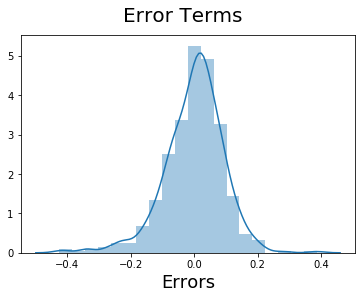

In [105]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

#### Applying the scaling on the test sets

In [106]:
num_vars = ['temp', 'atemp', 'hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [107]:
y_test = df_test.pop('cnt')
X_test = df_test

In [108]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_7.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [109]:
# Making predictions
y_pred = model_7.predict(X_test_new)

##### Spread looks Linear

Text(0, 0.5, 'y_pred')

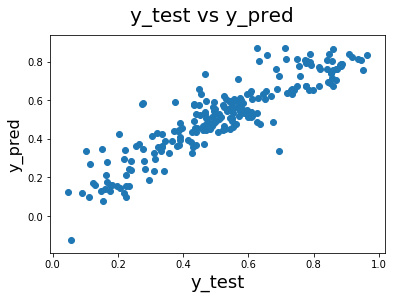

In [110]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

##### Calculate R-squared score on the test set

In [111]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.8089780460935857

##### Model 7 Looks quite decent

error terms are almost normally distributed. 
R squared and Adj R-squared as above 82
VIF is under 5
R squared on test set is above 80

But we still have summer having P value as .024 (its not pretty high though)

Check if we can achive the stats noted above with a lesser variable or not.

## MODEL 8

Drop summer from the model as its having the highest P Value and check the impact on model

In [112]:
X_train_9 = X_train_7.drop(['summer'], axis=1)

In [113]:
# Build a second fitted model
X_train_10 = sm.add_constant(X_train_9)

model_8 = sm.OLS(y_train, X_train_10).fit()

In [114]:
# Print the summary of the model
print(model_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Tue, 21 Apr 2020   Prob (F-statistic):          2.16e-181
Time:                        00:22:52   Log-Likelihood:                 479.38
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     500   BIC:                            -896.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1938      0.022      8.750

No much impact on R squared and Adj R-squared and magically all the P Values goes to almost 0

Check for VIF for Model 8

In [115]:
X_train_11 = X_train_10.drop(['const'], axis=1)

In [116]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_11
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.99
0,yr,2.05
6,Mist + Cloudy,1.51
4,winter,1.33
7,July,1.33
3,spring,1.25
8,Sep,1.19
5,Light Snow,1.06
1,holiday,1.04


VIF drops under 3 which is pretty good

## Residual Analysis of the train data - MODEL 8

In [117]:
y_train_cnt_2 = model_8.predict(X_train_10)

Text(0.5, 0, 'Errors')

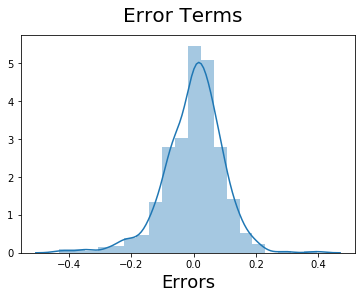

In [118]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt_2), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [119]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new_2 = X_test[X_train_11.columns]

# Adding a constant variable 
X_test_new_2 = sm.add_constant(X_test_new_2)

In [120]:
# Making predictions
y_pred_2 = model_8.predict(X_test_new_2)

Text(0, 0.5, 'y_pred')

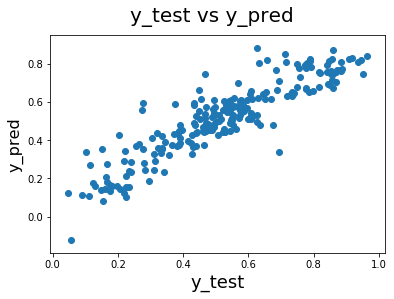

In [121]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_2)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [122]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_2)

0.8092200832884748

## Model 8 Looks good. We almost achived same stats as Model 7 by reducing 1 variable
error terms are almost normally distributed. R squared and Adj R-squared as above 82 VIF is under 5 R squared on test set is above 80

But we still have summer having P value as .024 (its not pretty high though)

Check if we can achive the stats noted above with a lesser variable or not.

### Can we make model even better. Lets see the correlation of remaining variables with target variable

In [123]:
new = day.filter(['temp','yr','Mist + Cloudy','winter','July','spring','Sep','Light Snow','holiday','cnt'], axis=1)

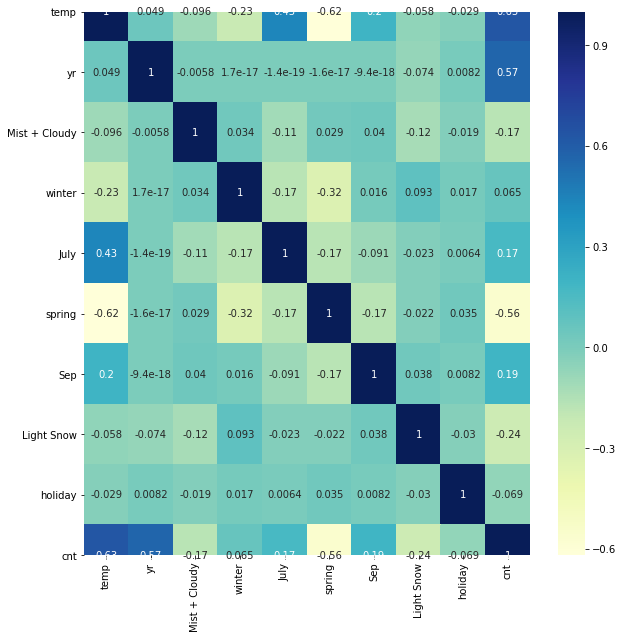

In [124]:
plt.figure(figsize = (10, 10))
sns.heatmap(new.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### Observe that July is most loosly correlated with Target variable cnt among all the remaining variable

## MODEL 9

Let's take a chance to see how removing July impacts on Model. Remember we already have Model 8 which is good

In [125]:
X_train_12 = X_train_11.drop(['July'], axis=1)

In [126]:
# Build a second fitted model
X_train_13 = sm.add_constant(X_train_12)

model_9 = sm.OLS(y_train, X_train_13).fit()

In [127]:
# Print the summary of the model
print(model_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     280.2
Date:                Tue, 21 Apr 2020   Prob (F-statistic):          1.65e-179
Time:                        00:23:06   Log-Likelihood:                 472.02
No. Observations:                 510   AIC:                            -926.0
Df Residuals:                     501   BIC:                            -887.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2099      0.022      9.520

With 8 variables left P Values remain almost 0 and R squared and Adj R-squared remain above 80

Check for VIF after removing July

In [128]:
X_train_14 = X_train_13.drop(['const'], axis=1)

In [129]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_14
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.38
0,yr,2.04
6,Mist + Cloudy,1.49
4,winter,1.29
3,spring,1.23
7,Sep,1.15
5,Light Snow,1.06
1,holiday,1.04


## Residual Analysis of the train data - MODEL 9

In [130]:
y_train_cnt_3 = model_9.predict(X_train_13)

Text(0.5, 0, 'Errors')

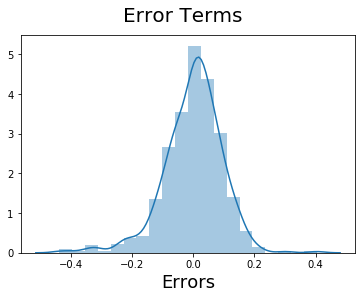

In [131]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt_3), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [132]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new_3 = X_test[X_train_14.columns]

# Adding a constant variable 
X_test_new_3 = sm.add_constant(X_test_new_3)

In [133]:
# Making predictions
y_pred_3 = model_9.predict(X_test_new_3)

Text(0, 0.5, 'y_pred')

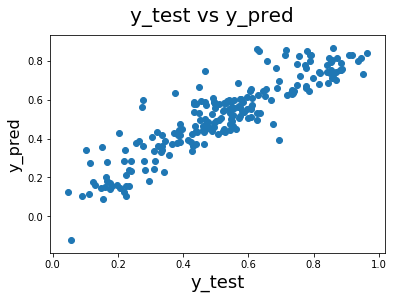

In [134]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_3)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [135]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_3)

0.8076276561547221

In [137]:
new2 = day.filter(['temp','yr','Mist + Cloudy','winter','spring','Sep','Light Snow','holiday','cnt'], axis=1)

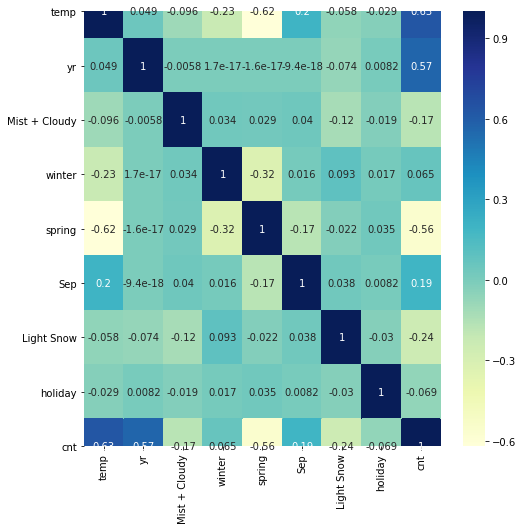

In [140]:
plt.figure(figsize = (8, 8))
sns.heatmap(new2.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Final Results

## Model 9 is our Final Model

##### Error terms are almost normally distributed. 
##### R squared and Adj R-squared as above 81.
##### Only 8 variables justify such high R squared and Adj R-squared 
##### R squared and Adj R-squared are quite near
##### P Values are almost 0
##### VIF is under 2.5
##### R squared on test set is above 80

We can see that the equation of our best fitted line is:

cnt = 0.2343×yr
-0.0996×holiday
+0.4293×temp
-0.1158×spring
+0.0562×winter
-0.3018×Light Snow
-0.0772×Mist + Cloudy
+0.0772×Sep
+constt